# Credit Card Approval

In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline as skPipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency

In [522]:
import os
os.chdir("C:\\Users\\zainu\downloads")

In [523]:
import warnings
warnings.filterwarnings("ignore")

In [524]:
credit_raw = pd.read_csv("Credit_card.csv")

In [525]:
credit_card = credit_raw.copy()

In [526]:
credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000,Pensioner,Higher education,Married,House / apartment,-18772,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,NaN,2


In [527]:
credit_label = pd.read_csv("Credit_card_label.csv")

In [528]:
credit_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [529]:
credit_label.shape

(1548, 2)

In [530]:
credit_card.shape

(1548, 18)

In [531]:
#Merging datasets
credit_1 = credit_card.combine_first(credit_label)

In [532]:
credit_1.head()

,Annual_income,Birthday_count,CHILDREN,Car_Owner,EDUCATION,EMAIL_ID,Employed_days,Family_Members,GENDER,Housing_type,Ind_ID,Marital_status,Mobile_phone,Phone,Propert_Owner,Type_Income,Type_Occupation,Work_Phone,label
0,180000,-18772,0,Y,Higher education,0,365243,2,M,House / apartment,5008827,Married,1,0,Y,Pensioner,NaN,0,1
1,315000,-13557,0,Y,Higher education,0,-586,2,F,House / apartment,5009744,Married,1,1,N,Commercial associate,NaN,1,1
2,315000,NaN,0,Y,Higher education,0,-586,2,F,House / apartment,5009746,Married,1,1,N,Commercial associate,NaN,1,1
3,NaN,-13557,0,Y,Higher education,0,-586,2,F,House / apartment,5009749,Married,1,1,N,Commercial associate,NaN,1,1
4,315000,-13557,0,Y,Higher education,0,-586,2,F,House / apartment,5009752,Married,1,1,N,Commercial associate,NaN,1,1


## Exploratory Data Analysis

### 1. Structure Investigation

In [533]:
credit_1.shape

(1548, 19)

**In our dataset there are 4240 records and 16 columns (variables)**

In [534]:
credit_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Annual_income    1525 non-null   float64
 1   Birthday_count   1526 non-null   float64
 2   CHILDREN         1548 non-null   int64  
 3   Car_Owner        1548 non-null   object 
 4   EDUCATION        1548 non-null   object 
 5   EMAIL_ID         1548 non-null   int64  
 6   Employed_days    1548 non-null   int64  
 7   Family_Members   1548 non-null   int64  
 8   GENDER           1541 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Ind_ID           1548 non-null   int64  
 11  Marital_status   1548 non-null   object 
 12  Mobile_phone     1548 non-null   int64  
 13  Phone            1548 non-null   int64  
 14  Propert_Owner    1548 non-null   object 
 15  Type_Income      1548 non-null   object 
 16  Type_Occupation  1060 non-null   object 
 17  Work_Phone    

**There are some missing values present in our dataset**

### 1. Numerical Variable

**Annual_income**: The annual income of the individual, representing their earnings over a year.

**Birthday_count**: Possibly the count of birthdays, which might be an unusual variable for a credit card approval project. It's unclear without additional context.

**CHILDREN:** The number of children the individual has.

**Employed_days:** The number of days the individual has been employed.

**Family_Members:** The count of family members in the individual's household.

### 2. Categorical Variable

**Car_Owner:** Indicates whether the individual owns a car or not.

**EDUCATION:** The educational background or level of the individual.

**EMAIL_ID:** The email address of the individual, which might be used for communication or identification purposes.

**GENDER:** The gender of the individual.

**Housing_type:** The type of housing the individual resides in (e.g., rented, owned).

**Ind_ID:** Individual identifier, likely a unique identification number.

**Marital_status**: The marital status of the individual (e.g., married, single).

**Mobile_phone:** Indicates whether the individual has a mobile phone.

**Phone:** Indicates whether the individual has a landline phone.

**Propert_Owner:** Indicates whether the individual owns any property.

**Type_Income:** The type of income the individual receives (e.g., salary, business income).

**Type_Occupation:** The type of occupation the individual is engaged in (e.g., service, self-employed).

**Work_Phone:** Indicates whether the individual has a work phone.

### Target Variable

**label:** This is the target variable, indicating whether the individual is approved or denied for a credit card (1 for approved, 0 for denied).

In [535]:
# Drop Unncessary features
credit_1.drop(columns = ['Birthday_count', 'EMAIL_ID', 'Mobile_phone', 'Phone', 'Work_Phone', 'Ind_ID'], inplace = True)

In [536]:
credit_1.head(2)

,Annual_income,CHILDREN,Car_Owner,EDUCATION,Employed_days,Family_Members,GENDER,Housing_type,Marital_status,Propert_Owner,Type_Income,Type_Occupation,label
0,180000,0,Y,Higher education,365243,2,M,House / apartment,Married,Y,Pensioner,NaN,1
1,315000,0,Y,Higher education,-586,2,F,House / apartment,Married,N,Commercial associate,NaN,1


In [537]:
credit_1.dtypes

Annual_income      float64
CHILDREN             int64
Car_Owner           object
EDUCATION           object
Employed_days        int64
Family_Members       int64
GENDER              object
Housing_type        object
Marital_status      object
Propert_Owner       object
Type_Income         object
Type_Occupation     object
label                int64
dtype: object

In [538]:
# Rename variable name
credit_1 = credit_1.rename(columns = {'CHILDREN':'Children','Car_Owner':'Car_owner','EDUCATION':'Education',
                                      'Family_Members':'Family_members', 'GENDER':'Gender','Propert_Owner':'Property_owner',
                                     'Type_Income':'Income_type', 'Type_Occupation':'Occupation_type', 'label':'Label'})

In [539]:
credit_1.tail(3)

,Annual_income,Children,Car_owner,Education,Employed_days,Family_members,Gender,Housing_type,Marital_status,Property_owner,Income_type,Occupation_type,Label
1545,180000,2,Y,Higher education,-2477,4,M,House / apartment,Married,Y,Working,Managers,0
1546,270000,0,Y,Secondary / secondary special,-645,2,M,House / apartment,Civil marriage,N,Working,Drivers,0
1547,225000,0,Y,Higher education,-2859,2,F,House / apartment,Married,Y,Working,NaN,0


### 2. Quality investigation

In [540]:
# check missing values in the data
credit_1.isnull().sum()

Annual_income       23
Children             0
Car_owner            0
Education            0
Employed_days        0
Family_members       0
Gender               7
Housing_type         0
Marital_status       0
Property_owner       0
Income_type          0
Occupation_type    488
Label                0
dtype: int64

In our dataset, **Annual_income, gender** has a few missing values, But **Occupation_type** has 488 missing values.

In [541]:
credit_1.drop_duplicates()

,Annual_income,Children,Car_owner,Education,Employed_days,Family_members,Gender,Housing_type,Marital_status,Property_owner,Income_type,Occupation_type,Label
0,180000,0,Y,Higher education,365243,2,M,House / apartment,Married,Y,Pensioner,NaN,1
1,315000,0,Y,Higher education,-586,2,F,House / apartment,Married,N,Commercial associate,NaN,1
3,NaN,0,Y,Higher education,-586,2,F,House / apartment,Married,N,Commercial associate,NaN,1
5,315000,0,Y,Higher education,-586,2,NaN,House / apartment,Married,N,Pensioner,NaN,1
7,180000,0,N,Secondary / secondary special,365243,2,F,House / apartment,Married,N,Pensioner,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,360000,1,Y,Secondary / secondary special,-3536,3,M,House / apartment,Married,N,State servant,Drivers,0
1543,NaN,0,N,Higher education,-2182,2,F,House / apartment,Married,Y,Commercial associate,Managers,0
1544,225000,0,N,Incomplete higher,-1209,1,F,House / apartment,Single / not married,N,Commercial associate,Accountants,0
1546,270000,0,Y,Secondary / secondary special,-645,2,M,House / apartment,Civil marriage,N,Working,Drivers,0


In [542]:
credit_1.head(10)

,Annual_income,Children,Car_owner,Education,Employed_days,Family_members,Gender,Housing_type,Marital_status,Property_owner,Income_type,Occupation_type,Label
0,180000,0,Y,Higher education,365243,2,M,House / apartment,Married,Y,Pensioner,NaN,1
1,315000,0,Y,Higher education,-586,2,F,House / apartment,Married,N,Commercial associate,NaN,1
2,315000,0,Y,Higher education,-586,2,F,House / apartment,Married,N,Commercial associate,NaN,1
3,NaN,0,Y,Higher education,-586,2,F,House / apartment,Married,N,Commercial associate,NaN,1
4,315000,0,Y,Higher education,-586,2,F,House / apartment,Married,N,Commercial associate,NaN,1
5,315000,0,Y,Higher education,-586,2,NaN,House / apartment,Married,N,Pensioner,NaN,1
6,315000,0,Y,Higher education,-586,2,F,House / apartment,Married,N,Commercial associate,NaN,1
7,180000,0,N,Secondary / secondary special,365243,2,F,House / apartment,Married,N,Pensioner,NaN,1
8,450000,1,Y,Secondary / secondary special,-678,3,M,House / apartment,Married,Y,Commercial associate,Core staff,1
9,450000,1,Y,Secondary / secondary special,-678,3,M,House / apartment,Married,Y,Pensioner,Core staff,1


In [543]:
# Drop Duplicates and error record
credit_1.drop([2,4,5,6,8,9,10,11,17], inplace = True)

In [544]:
# Convert it into a DataFrame
credit_1['Annual_income'] = pd.DataFrame(credit_1['Annual_income'])

In [545]:
credit_1['Employed_days'].unique()

array([365243,   -586,  -1002,   -913,   -248,  -2470,  -1644,  -4327,
        -1674,  -1086,   -925,   -854,   -185,  -3350,   -691,  -4770,
        -2394,   -384,  -3647,  -1546,   -808,  -1285,   -855,  -7369,
        -2269,  -4114,  -1161,  -7288,   -166,   -866,   -564,  -3366,
        -2150,  -1458,  -8369,   -508,  -1567,   -137,  -3974,  -1570,
        -2878,   -140,  -2576,  -1905,  -1724,  -1328,  -4987,  -3496,
        -1394,  -1265,  -2531,  -2105,   -860,   -217,   -535,  -6866,
         -584,  -2227,  -8161,   -613,   -606,  -6944,   -346,  -1808,
        -3420,   -863,  -7413,  -7553,  -3931,  -1039,   -134,   -622,
        -1595,  -1626,  -1868,   -555,  -1935,   -931,   -900,  -4305,
         -499,  -2418,   -189,  -1132,  -1770,   -919,  -1081,   -502,
        -2420,  -1325,  -6367,  -2484,   -341,  -9422,  -3054,  -2987,
        -2128,   -820,   -141,  -1692,  -4686,   -693,   -567,   -885,
        -2769,  -1547,  -3179,  -5204,  -3072,   -320,  -2469,   -583,
      

In [546]:
# Replace 365243 to - 2623
credit_2 = credit_1.copy()
credit_2['Employed_days'].replace(365243, -abs(2623), inplace=True)

In [547]:
# Create Years_employed variable from employed_days for easy readability
credit_2['Years_employed'] = round(credit_2['Employed_days'] / - abs(365))

In [548]:
credit_2.head(2)

,Annual_income,Children,Car_owner,Education,Employed_days,Family_members,Gender,Housing_type,Marital_status,Property_owner,Income_type,Occupation_type,Label,Years_employed
0,180000,0,Y,Higher education,-2623,2,M,House / apartment,Married,Y,Pensioner,NaN,1,7
1,315000,0,Y,Higher education,-586,2,F,House / apartment,Married,N,Commercial associate,NaN,1,2


In [549]:
# Drop Employed_days variable
credit_2.drop('Employed_days', axis=1, inplace=True)

In [550]:
credit_2['Occupation_type'].unique()

array([nan, 'Cooking staff', 'Laborers', 'Sales staff', 'Accountants',
       'High skill tech staff', 'Managers', 'Cleaning staff', 'Drivers',
       'Low-skill Laborers', 'IT staff', 'Waiters/barmen staff',
       'Core staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [551]:
credit_2.tail(1)

,Annual_income,Children,Car_owner,Education,Family_members,Gender,Housing_type,Marital_status,Property_owner,Income_type,Occupation_type,Label,Years_employed
1547,225000,0,Y,Higher education,2,F,House / apartment,Married,Y,Working,NaN,0,8


### 3. Content Investigation

In [552]:
pd.set_option('display.float_format', '{:.0f}'.format)
print(credit_2.describe())

       Annual_income  Children  Family_members  Label  Years_employed
count           1516      1539            1539   1539            1539
mean          190671         0               2      0               7
std           112781         1               1      0               6
min            33750         0               1      0               0
25%           121500         0               2      0               3
50%           162000         0               2      0               7
75%           225000         1               3      0               9
max          1575000        14              15      1              41


In [553]:
# Assuming credit_2 is your DataFrame
numeric_features = credit_2.select_dtypes(include="number")
categorical_features = credit_2.select_dtypes(include="object")

# Plot for numerical features
numeric_unique_values = numeric_features.nunique().sort_values()
fig_numeric = px.bar(numeric_unique_values, log_y=True, title="Unique Values per Numerical Feature",
                     labels={"index": "Feature", "value": "Unique Values"})
fig_numeric.update_layout(xaxis_title="Numerical Feature", yaxis_title="Unique Values", showlegend=False)

# Plot for categorical features
categorical_unique_values = categorical_features.nunique().sort_values()
fig_categorical = px.bar(categorical_unique_values, log_y=True, title="Unique Values per Categorical Feature",
                         labels={"index": "Feature", "value": "Unique Values"})
fig_categorical.update_layout(xaxis_title="Categorical Feature", yaxis_title="Unique Values", showlegend=False)

# Show both figures
fig_numeric.show()
fig_categorical.show()


### 1. Univariate Analysis

In [554]:
count = credit_2["Label"].value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(x = ["Denied", "Approved"], y = count))
fig.update_layout(title = "Credit Card Approved vs Credit Card Denied", height = 400, width = 400)

fig.show()

**the bar plot analysis above indicates an imbalance within our target variable.**

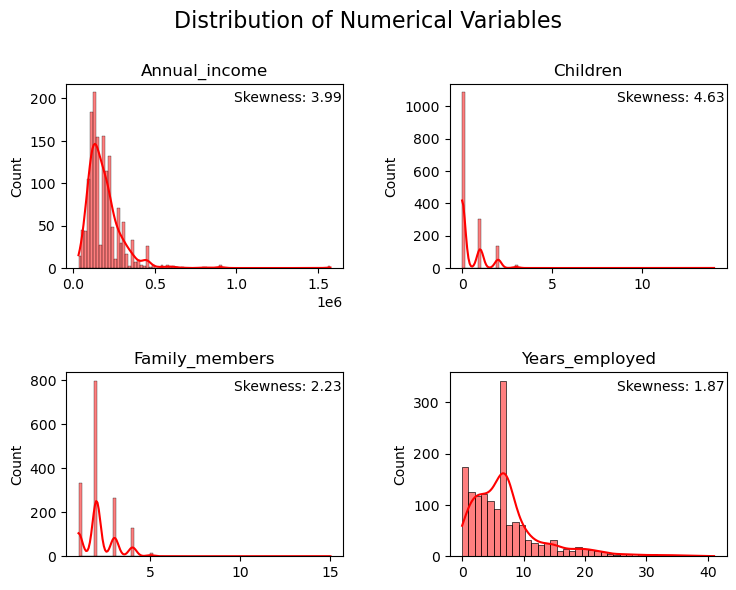

In [555]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Define the numerical columns
numerical_columns = ['Annual_income', 'Children', 'Family_members', 'Years_employed']

# Iterate through each numerical column and plot the distribution
for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    
    # Plot histogram
    sns.histplot(credit_2[column], kde=True, ax=axes[row, col], color='red')
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('')
    
    # Calculate and display skewness value using pandas
    skewness = credit_2[column].skew()
    axes[row, col].text(0.8, 0.9, f"Skewness: {skewness:.2f}", transform=axes[row, col].transAxes, ha='center')

# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Add a title to the plot
plt.suptitle("Distribution of Numerical Variables", y=1.02, fontsize=16)

# Show the plot
plt.show()

**The histograms reveal notable skewness in all numerical variables, with certain columns, such as 'Annual_income' and 'Children', exhibiting particularly high degrees of skewness.**

In [556]:
count = credit_2["Car_owner"].value_counts()
labels = ["No", "Yes"]
values = count.values


# Create subplot with 1 row and 2 columns, using type='domain'
fig = make_subplots(rows=1, cols=2, subplot_titles=['Distribution of Car Owner', 'Distribution of Property Owner'], specs=[[{'type':'domain'}, {'type':'domain'}]])

# First Pie Chart
fig.add_trace(go.Pie(labels=labels, values=values, hole=0.3, rotation = 45), 1, 1)


# Second Pie Chart
count_other = credit_2["Property_owner"].value_counts()
labelss = ["Yes", "No"]
values_other = count_other.values

fig.add_trace(go.Pie(labels=labelss, values=values_other, hole=0.3, marker_colors = ["Green", "Red"]), 1, 2)

# Update layout
fig.update_layout(height=400, showlegend=False)

# Show the plot
fig.show()

**A notable 40% of individuals within the dataset are identified as car owners, while a substantial 65.3% of individuals exhibit ownership of property.**

In [557]:
# Using countplot checked the distribution
count_education = credit_2['Education'].value_counts().reset_index()
count_education.columns = ['Education', 'Count']

# Create a bar plot with inclined x-axis labels
fig = px.bar(count_education, x='Education', y='Count', title='Distribution of Education')
fig.update_layout(xaxis=dict(tickangle=45))

# Show the plot
fig.show()

**More individuals in our dataset have completed Secondary/ secondary special education, with a subsequent trend of pursuing higher education.**

In [558]:
# Distribution of Housing type
count_housing_type = credit_2['Housing_type'].value_counts().reset_index()
count_housing_type.columns = ['Housing_type', 'Count']

# Distribution of Income type
count_income_type = credit_2['Income_type'].value_counts().reset_index()
count_income_type.columns = ['Income_type', 'Count']

# Create subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=['Distribution of Housing type', 'Distribution of Income type'])

# Bar plot for Housing type
fig.add_trace(px.bar(count_housing_type, x='Housing_type', y='Count').update_layout(xaxis=dict(tickangle=45)).data[0], row=1, col=1)

# Bar plot for Income type
fig.add_trace(px.bar(count_income_type, x='Income_type', y='Count').update_layout(xaxis=dict(tickangle=45)).data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False)

# Show the plot
fig.show()


**The dataset reveals a predominant trend, indicating that a larger proportion of individuals reside in houses compared to other types of apartments.**

In [559]:
count = credit_2["Gender"].value_counts()
print(count)
fig = go.Figure()
fig.add_trace(go.Bar(x = ["Female", "Male"], y = count))
fig.update_layout(title = "Male vs Female", height = 400, width = 400)
fig.show()

# Using countplot checked the distribution of Marital_status
count_education = credit_2['Marital_status'].value_counts().reset_index()
count_education.columns = ['Marital_status', 'Count']

# Create a bar plot with inclined x-axis labels
fig = px.bar(count_education, x='Marital_status', y='Count', title='Distribution of Marital Status')
fig.update_layout(xaxis=dict(tickangle=45), width = 500)

# Show the plot
fig.show()


# Using countplot checked the distribution of Occupation_type
count_education = credit_2['Occupation_type'].value_counts().reset_index()
count_education.columns = ['Occupation_type', 'Count']

# Create a bar plot with inclined x-axis labels
fig = px.bar(count_education, x='Occupation_type', y='Count', title='Distribution ofOccupation type')
fig.update_layout(xaxis=dict(tickangle=45), width = 700)

# Show the plot
fig.show()

F    968
M    565
Name: Gender, dtype: int64


**In our dataset, there is a higher number of records for females compared to males.**

**We have more number of recrods for Married people**

<AxesSubplot:>

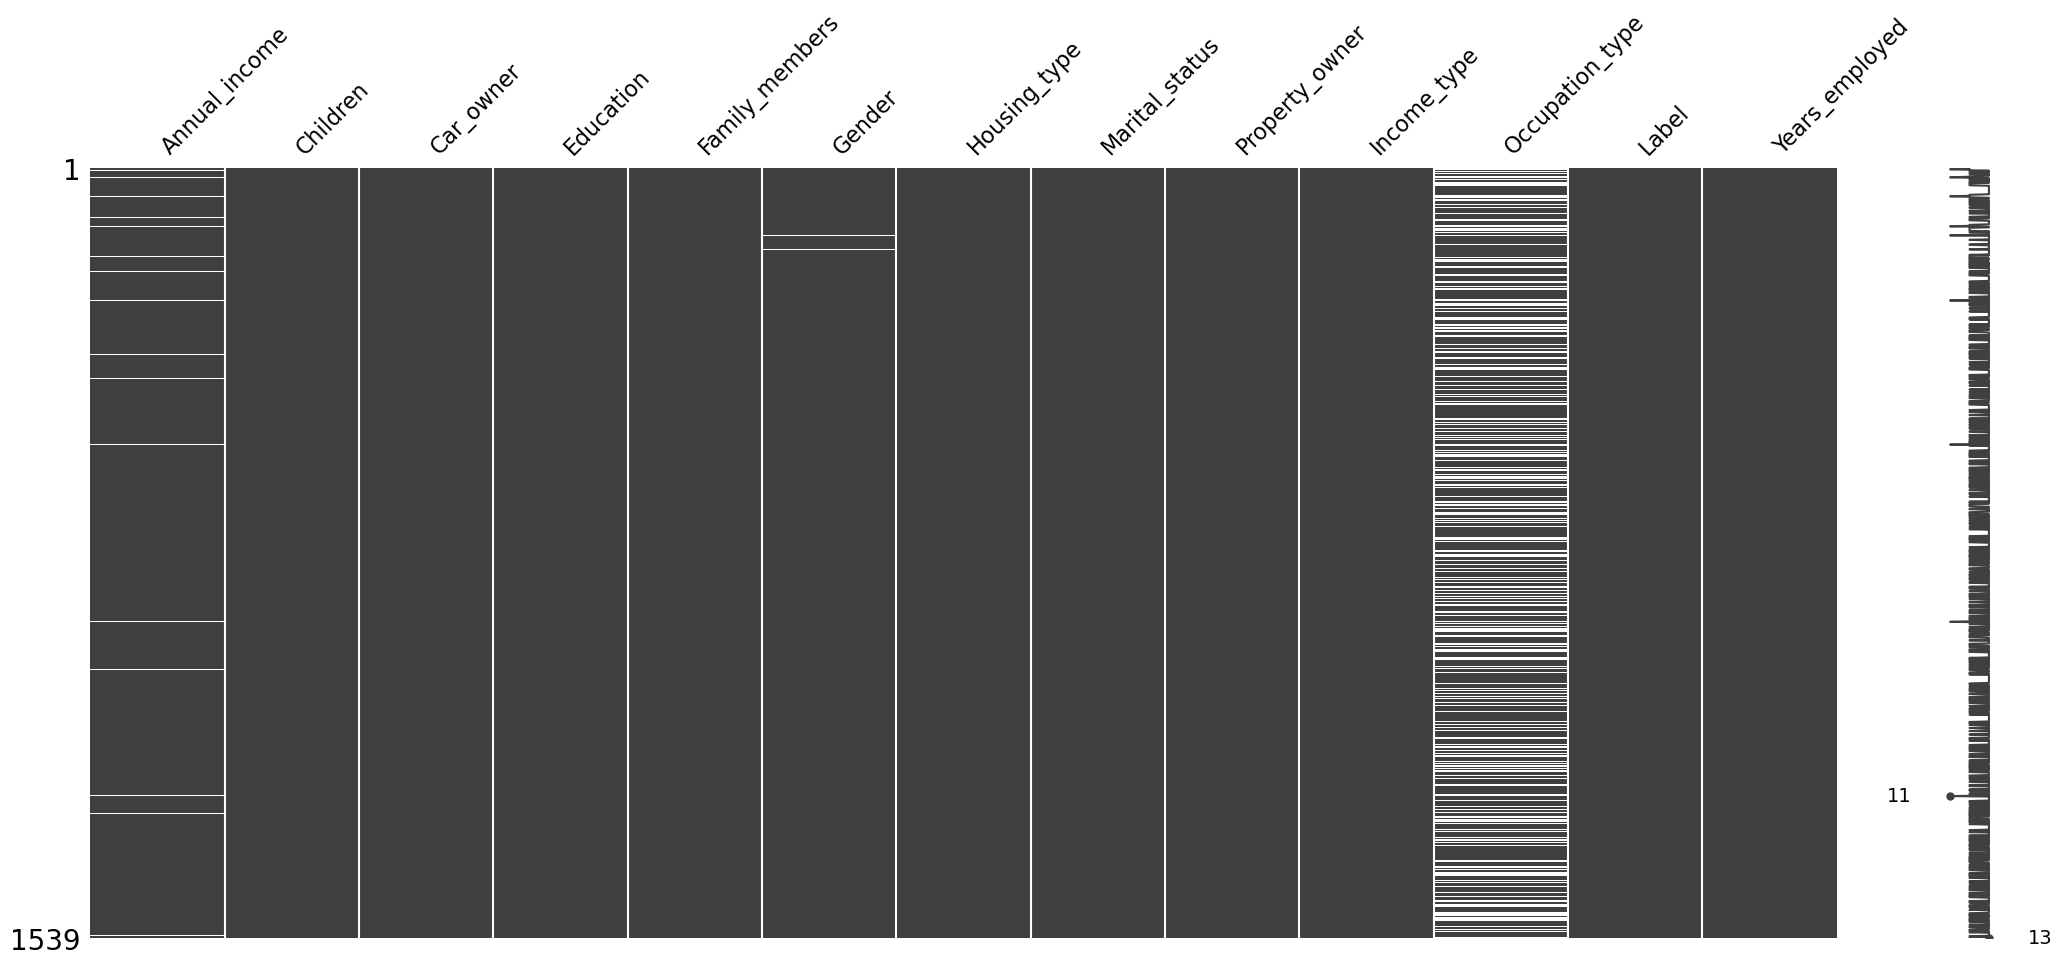

In [560]:
msno.matrix(credit_2)

**There is no any systematic pattern in missing values.**

### Identify Outliers

In [561]:
# Create subplots with 4 rows and 2 columns
fig = make_subplots(rows=2, cols=2, subplot_titles=[
    'Annual Income', 'Years Employed', 'Children',
    'Family Members'
])

# Add boxplots to each subplot
fig.add_trace(go.Box(x=credit_2['Annual_income']), row=1, col=1)
fig.add_trace(go.Box(x=credit_2['Years_employed']), row=1, col=2)
fig.add_trace(go.Box(x=credit_2['Children']), row=2, col=1)
fig.add_trace(go.Box(x=credit_2['Family_members']), row=2, col=2)

# Update layout for better readability
fig.update_layout(
    title='Using Boxplot to Check for Outliers',
    height=600,
    showlegend=False  # Set to True if you want to display legends
)

# Show the plot
fig.show()

**The Boxplot analysis reveals the presence of outliers in all variables.**

### Bivariate Analysis

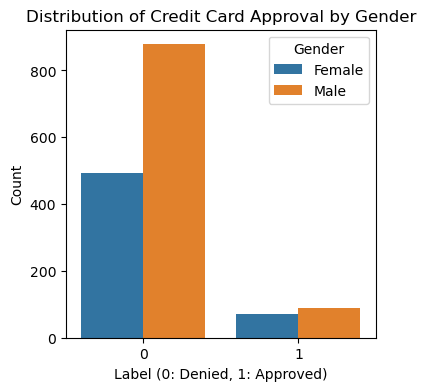

In [562]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Label', hue='Gender', data= credit_2)
plt.title('Distribution of Credit Card Approval by Gender')
plt.xlabel('Label (0: Denied, 1: Approved)')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

**The clustered bar chart analysis suggests a higher number of credit card denials for females compared to males.**

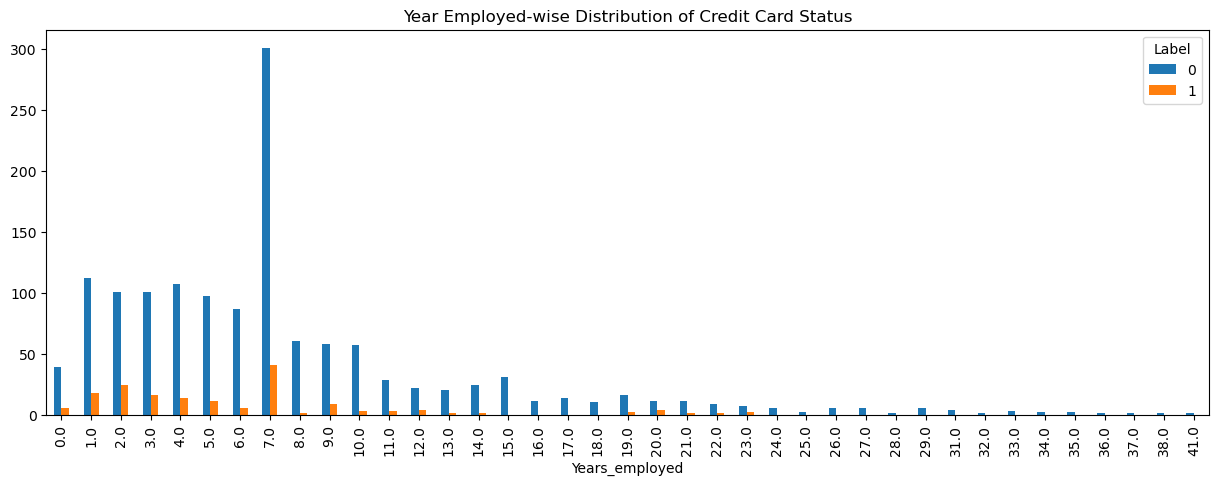

In [563]:
# Set the default figure size
plt.rcParams['figure.figsize'] = (15, 5)

# Group by age and TenYearCHD, then count occurrences and unstack for better visualization
age_effect_count = credit_2.groupby(['Years_employed', 'Label']).size().unstack()

# Plot the bar chart
age_effect_count.plot(kind='bar')

# Set the title
plt.title('Year Employed-wise Distribution of Credit Card Status')

# Show the plot
plt.show()

**The analysis of the grouped bar chart indicates a positive correlation, suggesting that individuals with a higher number of employed years are more likely to receive credit card approvals.**

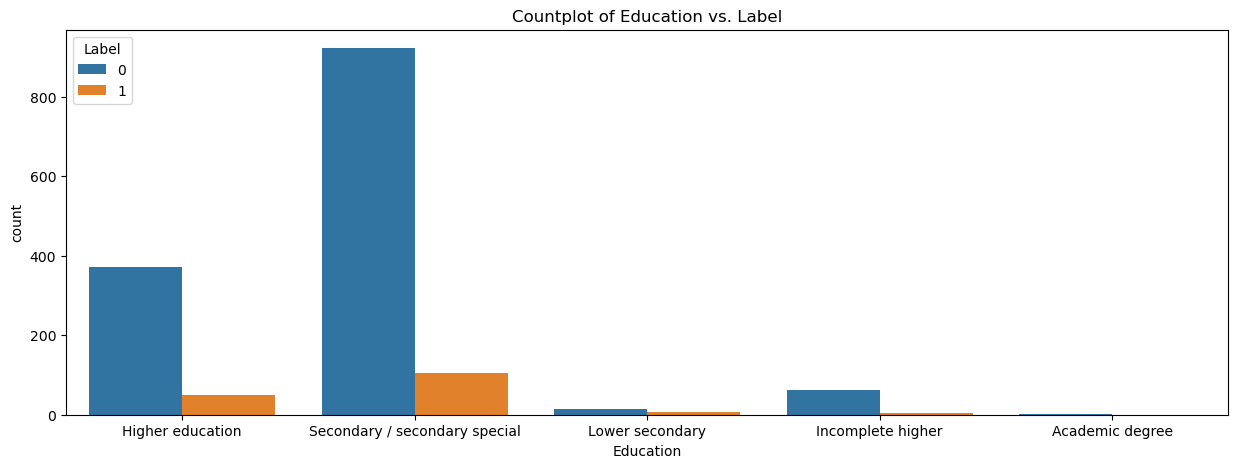

In [564]:
sns.countplot(x="Education", hue="Label", data=credit_2)
plt.title("Countplot of Education vs. Label")
plt.show()

**People with a Secondary Education background are more likely to be approved for a credit card.**

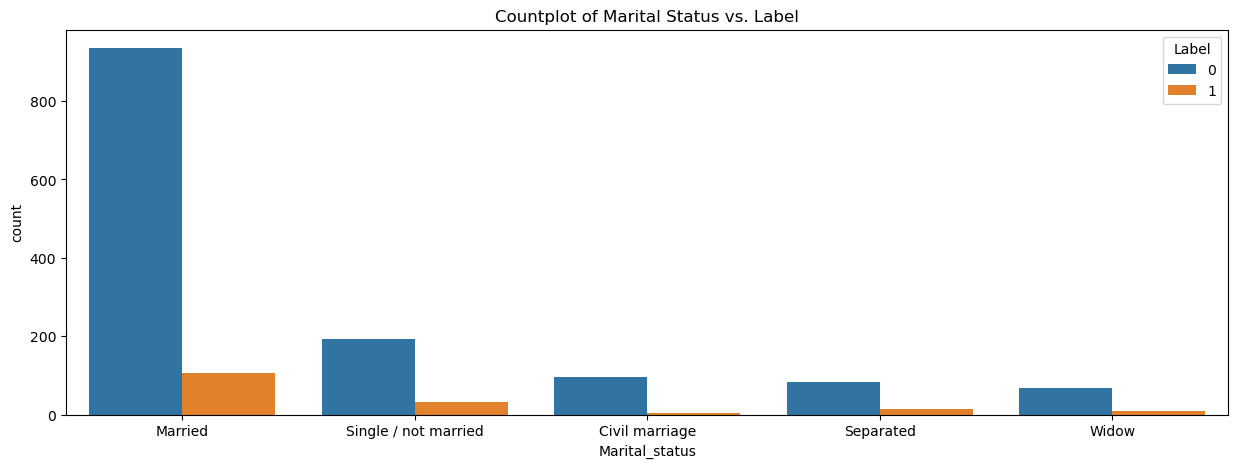

In [565]:
sns.countplot(x="Marital_status", hue="Label", data=credit_2)
plt.title("Countplot of Marital Status vs. Label")
plt.show()

**The dataset indicates that individuals who are married have the highest likelihood of getting approved for a credit card.**

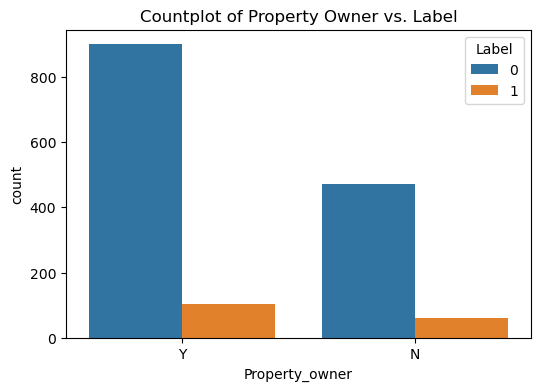

In [566]:
fig = plt.figure(figsize = (6,4))
sns.countplot(x="Property_owner", hue="Label", data=credit_2)
plt.title("Countplot of Property Owner vs. Label")
fig.show()

**Individuals who own property are slightly more likely to be approved for a credit card in our dataset.**

## Data Preprocessing

In [567]:
credit_2.isnull().sum()

Annual_income       23
Children             0
Car_owner            0
Education            0
Family_members       0
Gender               6
Housing_type         0
Marital_status       0
Property_owner       0
Income_type          0
Occupation_type    484
Label                0
Years_employed       0
dtype: int64

In [568]:
# drop Occupation_type variable because it has 484 no. of missing values
credit_2.drop('Occupation_type', axis = 1, inplace = True)

### Missing values imputation

#### Mode Imputation for gender column

In [569]:
# Calculate the mode of the "Gender" column
gender_mode = credit_2['Gender'].mode()[0]

# Fill missing values with the mode
credit_2['Gender'].fillna(gender_mode, inplace=True)

**2. Using KNN Imputation technique**

In [570]:
credit_missing = credit_2[['Annual_income', 'Children', 'Years_employed', 'Family_members']]

In [571]:
# Create a KNNImputer object
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation on the DataFrame
credit_imputed = pd.DataFrame(knn_imputer.fit_transform(credit_missing), columns=credit_missing.columns)

In [572]:
credit_imputed.isnull().sum()

Annual_income     0
Children          0
Years_employed    0
Family_members    0
dtype: int64

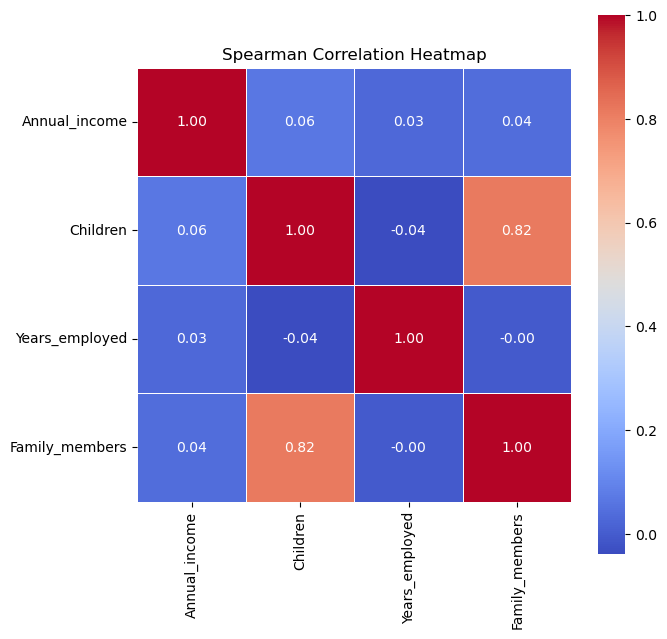

In [573]:
# Calculate the Spearman correlation matrix
correlation_matrix_spearman = credit_imputed.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(7, 7))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, square=True)

# Set the title of the heatmap
plt.title('Spearman Correlation Heatmap')

# Show the plot
plt.show()

sysBP and diaBP shows a postive correlation

In [574]:
# Merging the dataframe with the imputed dataset
categorical_col = credit_2.drop(['Annual_income', 'Children', 'Years_employed', 'Family_members'], axis=1)
credit_new = pd.concat([categorical_col, credit_imputed], axis=1)

In [575]:
credit_new.dropna(inplace = True)

In [576]:
credit_new.isnull().sum()

Car_owner         0
Education         0
Gender            0
Housing_type      0
Marital_status    0
Property_owner    0
Income_type       0
Label             0
Annual_income     0
Children          0
Years_employed    0
Family_members    0
dtype: int64

### Outliers treatment

In [577]:
# Create subplots with 4 rows and 2 columns
fig = make_subplots(rows=2, cols=2, subplot_titles=[
    'Annual Income', 'Years Employed', 'Children',
    'Family Members'
])

# Add boxplots to each subplot
fig.add_trace(go.Box(x=credit_new['Annual_income']), row=1, col=1)
fig.add_trace(go.Box(x=credit_new['Years_employed']), row=1, col=2)
fig.add_trace(go.Box(x=credit_new['Children']), row=2, col=1)
fig.add_trace(go.Box(x=credit_new['Family_members']), row=2, col=2)

# Update layout for better readability
fig.update_layout(
    title='Using Boxplot to Check for Outliers',
    height=600,
    showlegend=False  # Set to True if you want to display legends
)

# Show the plot
fig.show()

In [578]:
credit_new[credit_new['Children'] == 14]

,Car_owner,Education,Gender,Housing_type,Marital_status,Property_owner,Income_type,Label,Annual_income,Children,Years_employed,Family_members
556,N,Secondary / secondary special,F,House / apartment,Separated,N,Working,0,225000,14,5,15


In [579]:
# Drop extreme outliers from Children variable
credit_new.drop([556], inplace = True)

#### Outlier treatment for Annual Income

In [580]:
# Create a new DataFrame for transformed data
credit_transformed = credit_new.copy()

In [581]:
credit_transformed['Sqrt_annual_income'] = np.sqrt(credit_transformed['Annual_income'] )

<AxesSubplot:xlabel='Sqrt_annual_income'>

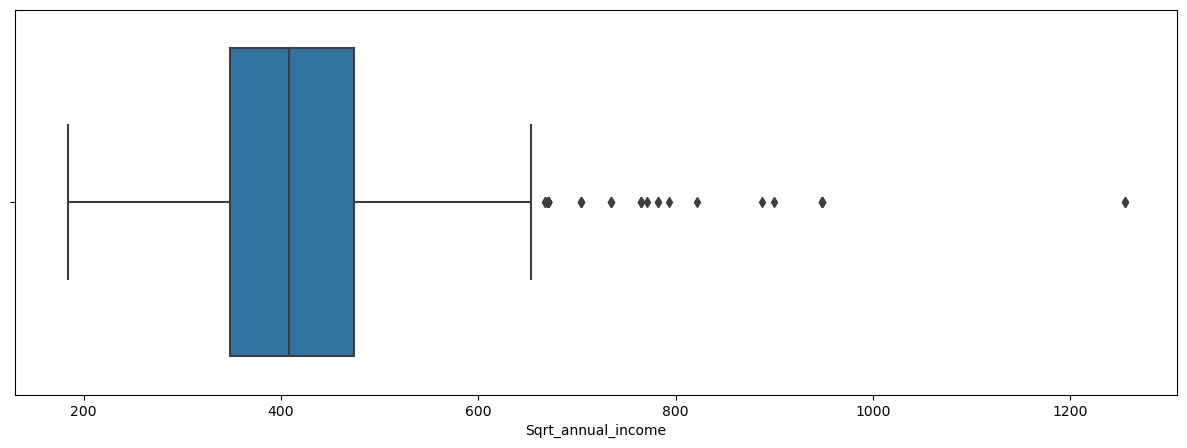

In [582]:
sns.boxplot(credit_transformed['Sqrt_annual_income'])

### Outlier treatment for Years Employed

In [583]:
credit_transformed['Log_years_employed'] = np.log(credit_transformed['Years_employed'])

<AxesSubplot:xlabel='Log_years_employed'>

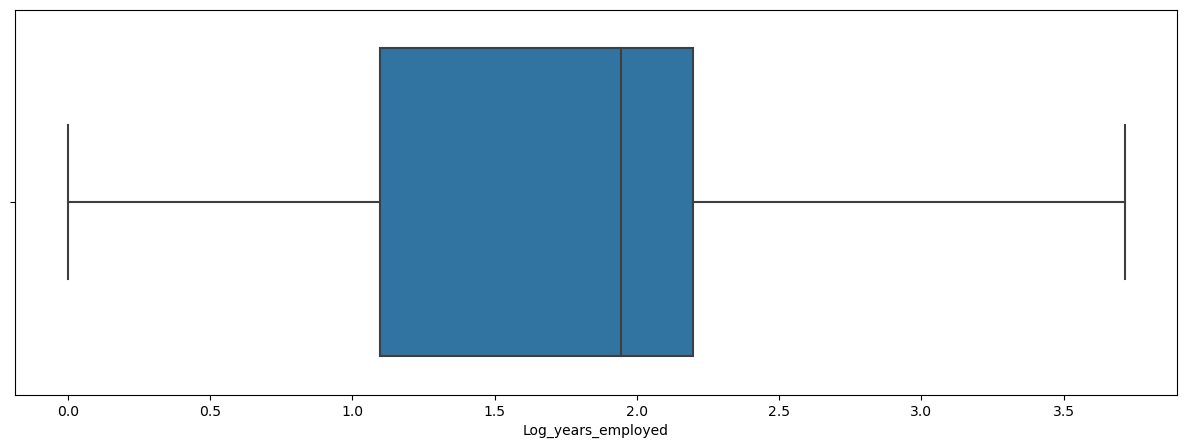

In [584]:
sns.boxplot(credit_transformed['Log_years_employed'])

In [585]:
# Assuming 'Annual_income', 'log_annual', 'sqrt_annual' are the column names you want to drop
columns_to_drop = ['Annual_income', 'Years_employed']
credit_transformed.drop(columns=columns_to_drop, inplace=True)

In [586]:
credit_transformed.head(1)

,Car_owner,Education,Gender,Housing_type,Marital_status,Property_owner,Income_type,Label,Children,Family_members,Sqrt_annual_income,Log_years_employed
0,Y,Higher education,M,House / apartment,Married,Y,Pensioner,1,0,2,424,2


### Feature Encoding

In [587]:
credit_encoded = credit_transformed.copy()

In [588]:
# Encode gender column 1 for female and 0 for male
gender_mapping = {'M': 0, 'F': 1}
credit_encoded['Gender_encoded'] = credit_encoded['Gender'].map(gender_mapping)

In [589]:
carOwner_mapping = {'N': 0, 'Y': 1}
credit_encoded['Car_owner_encoded'] = credit_encoded['Car_owner'].map(carOwner_mapping)

In [590]:
propertyOwner_mapping = {'N': 0, 'Y': 1}
credit_encoded['Property_owner_encoded'] = credit_encoded['Property_owner'].map(propertyOwner_mapping)

In [591]:
credit_encoded.head(1)

,Car_owner,Education,Gender,Housing_type,Marital_status,Property_owner,Income_type,Label,Children,Family_members,Sqrt_annual_income,Log_years_employed,Gender_encoded,Car_owner_encoded,Property_owner_encoded
0,Y,Higher education,M,House / apartment,Married,Y,Pensioner,1,0,2,424,2,0,1,1


In [592]:
credit_encoded['Income_type'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [593]:
from sklearn.preprocessing import OneHotEncoder

income_type_column = pd.DataFrame(credit_encoded['Income_type'])

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid the dummy variable trap

# Fit and transform the 'Income_type' column
income_type_encoded = encoder.fit_transform(income_type_column)

# Create column names for the one-hot encoded features
encoded_feature_names = [category for category in encoder.get_feature_names_out(['Income_type'])]

# Create a DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(income_type_encoded, columns=encoded_feature_names)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
credit_encoded = pd.concat([credit_encoded, encoded_df], axis=1)


In [594]:
# Display the updated DataFrame
credit_encoded.head()

,Car_owner,Education,Gender,Housing_type,Marital_status,Property_owner,Income_type,Label,Children,Family_members,Sqrt_annual_income,Log_years_employed,Gender_encoded,Car_owner_encoded,Property_owner_encoded,Income_type_Pensioner,Income_type_State servant,Income_type_Working
0,Y,Higher education,M,House / apartment,Married,Y,Pensioner,1,0,2,424,2,0,1,1,1,0,0
1,Y,Higher education,F,House / apartment,Married,N,Commercial associate,1,0,2,561,1,1,1,0,0,0,0
3,Y,Higher education,F,House / apartment,Married,N,Commercial associate,1,0,2,424,2,1,1,0,1,0,0
7,N,Secondary / secondary special,F,House / apartment,Married,N,Pensioner,1,0,2,520,0,1,0,0,0,0,1
12,Y,Secondary / secondary special,F,House / apartment,Married,Y,Working,1,0,2,450,2,1,1,1,0,0,0


In [595]:
credit_encoded['Education'] = credit_encoded['Education'].apply(lambda x: 1 if x == 'Lower secondary'
else (2 if x == 'Secondary / secondary special' else (3 if x == 'Incomplete higher' 
                                                      else (4 if x == 'Higher education' else 5))))

In [596]:
credit_encoded.head()

,Car_owner,Education,Gender,Housing_type,Marital_status,Property_owner,Income_type,Label,Children,Family_members,Sqrt_annual_income,Log_years_employed,Gender_encoded,Car_owner_encoded,Property_owner_encoded,Income_type_Pensioner,Income_type_State servant,Income_type_Working
0,Y,4,M,House / apartment,Married,Y,Pensioner,1,0,2,424,2,0,1,1,1,0,0
1,Y,4,F,House / apartment,Married,N,Commercial associate,1,0,2,561,1,1,1,0,0,0,0
3,Y,4,F,House / apartment,Married,N,Commercial associate,1,0,2,424,2,1,1,0,1,0,0
7,N,2,F,House / apartment,Married,N,Pensioner,1,0,2,520,0,1,0,0,0,0,1
12,Y,2,F,House / apartment,Married,Y,Working,1,0,2,450,2,1,1,1,0,0,0


In [597]:
# Drop duplicate features
drop_columns = ['Car_owner', 'Gender', 'Housing_type', 'Marital_status', 'Property_owner', 'Income_type']
credit_card = credit_encoded.drop(drop_columns, axis = 1)

In [598]:
credit_card.dropna(inplace = True)

In [599]:
credit_card.head()

,Education,Label,Children,Family_members,Sqrt_annual_income,Log_years_employed,Gender_encoded,Car_owner_encoded,Property_owner_encoded,Income_type_Pensioner,Income_type_State servant,Income_type_Working
0,4,1,0,2,424,2,0,1,1,1,0,0
1,4,1,0,2,561,1,1,1,0,0,0,0
3,4,1,0,2,424,2,1,1,0,1,0,0
7,2,1,0,2,520,0,1,0,0,0,0,1
12,2,1,0,2,450,2,1,1,1,0,0,0


In [600]:
credit_card.dtypes

Education                      int64
Label                        float64
Children                     float64
Family_members               float64
Sqrt_annual_income           float64
Log_years_employed           float64
Gender_encoded               float64
Car_owner_encoded            float64
Property_owner_encoded       float64
Income_type_Pensioner        float64
Income_type_State servant    float64
Income_type_Working          float64
dtype: object

In [601]:
credit_card['Children'] = credit_card['Children'].astype('int')

In [602]:
credit_card['Family_members'] = credit_card['Family_members'].astype('int')

In [603]:
credit_card['Gender_encoded'] = credit_card['Gender_encoded'].astype('int')

In [604]:
credit_card['Car_owner_encoded'] = credit_card['Car_owner_encoded'].astype('int')

In [605]:
credit_card['Property_owner_encoded'] = credit_card['Property_owner_encoded'].astype('int')

In [606]:
credit_card['Income_type_Pensioner'] = credit_card['Income_type_Pensioner'].astype('int')

In [607]:
credit_card['Income_type_State servant'] = credit_card['Income_type_State servant'].astype('int')

In [608]:
credit_card['Income_type_Working'] = credit_card['Income_type_Working'].astype('int')

In [609]:
# Check for missing values
print("Missing values in X:\n", credit_card.isnull().sum())

# Check for infinite values
print("Infinite values in X:\n", np.isinf(credit_card).sum())

# Replace infinite values with NaN
credit_card.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with a specific value or using imputation methods
credit_card.fillna(0, inplace=True)  # Replace NaN with 0 (you may choose a different strategy)

Missing values in X:
 Education                    0
Label                        0
Children                     0
Family_members               0
Sqrt_annual_income           0
Log_years_employed           0
Gender_encoded               0
Car_owner_encoded            0
Property_owner_encoded       0
Income_type_Pensioner        0
Income_type_State servant    0
Income_type_Working          0
dtype: int64
Infinite values in X:
 Education                     0
Label                         0
Children                      0
Family_members                0
Sqrt_annual_income            0
Log_years_employed           44
Gender_encoded                0
Car_owner_encoded             0
Property_owner_encoded        0
Income_type_Pensioner         0
Income_type_State servant     0
Income_type_Working           0
dtype: int64


### Feature Selection

#### 1. Using Chi Square test

In [610]:
X = credit_card.drop(['Label'], axis=1)
y = credit_card['Label']

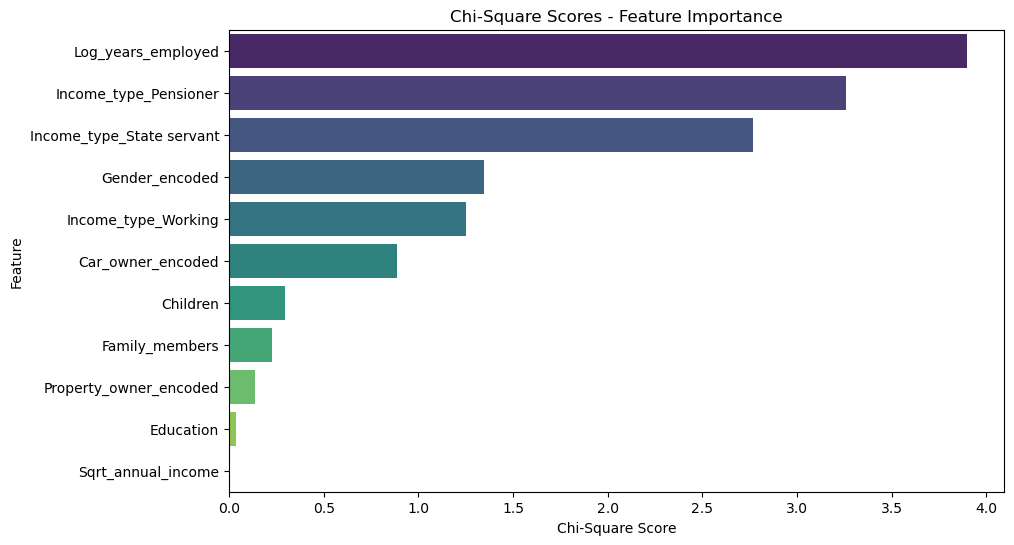

In [611]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_best = 11
chi2_selector = SelectKBest(chi2, k=k_best)
X_new = chi2_selector.fit_transform(X, y)

# Get selected feature indices
selected_features = chi2_selector.get_support()

# Create a DataFrame with column names and chi-square scores
features_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_selector.scores_})

# Filter the DataFrame based on selected features
features_df = features_df[features_df['Feature'].isin(X.columns[selected_features])]

# Sort the DataFrame by chi-square scores in descending order
features_df = features_df.sort_values(by='Chi2 Score', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2 Score', y='Feature', data=features_df, palette='viridis')
plt.title('Chi-Square Scores - Feature Importance')
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.show()

## Load and Prepare Data

In [612]:
X = credit_card.drop(['Label'], axis=1)
y = credit_card['Label']

## Data Preprocessing Pipeline

In [613]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline as skPipeline

# Assuming heartRate_category_encoded, BMI_category_encoded, totCholestrol_encoded are ordinal encoded
binary_encoded_column = ['Gender_encoded', 'Property_owner_encoded', 'Car_owner_encoded']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Sqrt_annual_income', 'Log_years_employed']),
        ('cat', OneHotEncoder(), ['Education', 'Children', 'Family_members', 'Income_type_Pensioner','Income_type_State servant', 'Income_type_Working']  + binary_encoded_column)
    ])

# Create a pipeline that preprocesses the data and then trains a classifier
clf = skPipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])


## Resampling with SMOTE

In [614]:
# Define the resampling strategy
over = SMOTE(sampling_strategy='auto')  # Adjust this value  0.2


# Apply resampling to the data
X_resampled, y_resampled = over.fit_resample(X, y)

## Train Test Split

In [615]:
# Split resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Hyperparameter Tuning with Randomized SearchCV

In [616]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10}


### Model Evaluation 

In [617]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = random_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       277
         1.0       0.81      0.85      0.83       265

    accuracy                           0.83       542
   macro avg       0.83      0.83      0.83       542
weighted avg       0.83      0.83      0.83       542



### Try Different Algorithms to Find the Best

## 1. Random Forest Classifier

In [618]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Creating a Random Forest classifier with specified hyperparameters
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Training the model
rf.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred_rf = rf.predict(X_test)

# Calculating the accuracy of the model
accuracy = round(accuracy_score(y_test, y_pred_rf), 2)
print("Accuracy:", accuracy)

Accuracy: 0.86


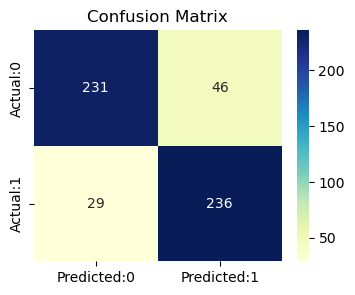

In [619]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame for the confusion matrix
conf_matrix_data = {
    'Predicted:0': cm[:, 0],
    'Predicted:1': cm[:, 1]
}

conf_matrix = pd.DataFrame(data=conf_matrix_data, index=['Actual:0', 'Actual:1'])

# Plot the heatmap with decreased size
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

plt.title('Confusion Matrix')
plt.show()

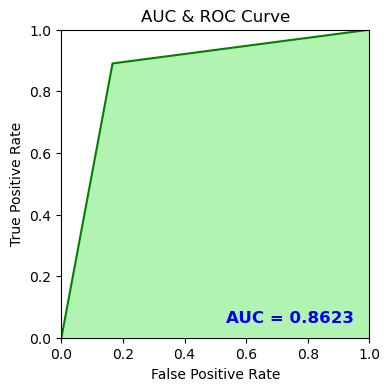

In [620]:
from sklearn.metrics import roc_curve, auc

# Calculate auc
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_rf)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_rf)

plt.figure(figsize=(6, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## 2. K - Nearest Neighbour

In [621]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

# Creating a K-Nearest Neighbors classifier with, for example, k=3 (you can adjust the value of k)
knn = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred_knn = knn.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.8357933579335793


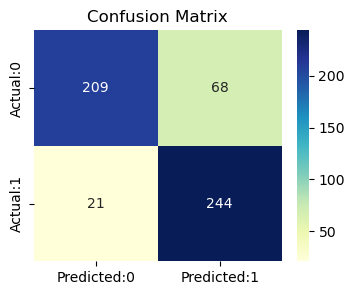

In [622]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Create a DataFrame for the confusion matrix
conf_matrix_data = {
    'Predicted:0': cm[:, 0],
    'Predicted:1': cm[:, 1]
}

conf_matrix = pd.DataFrame(data=conf_matrix_data, index=['Actual:0', 'Actual:1'])

# Plot the heatmap with decreased size
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

plt.title('Confusion Matrix')
plt.show()

In [623]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_knn)

print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82       277
         1.0       0.78      0.92      0.85       265

    accuracy                           0.84       542
   macro avg       0.85      0.84      0.84       542
weighted avg       0.85      0.84      0.83       542



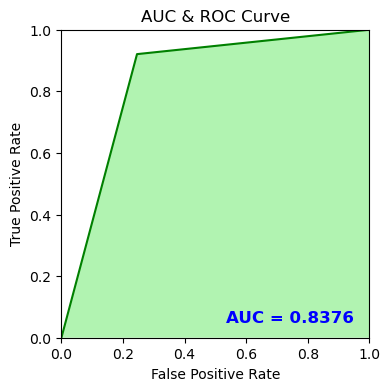

In [624]:
from sklearn.metrics import roc_curve, auc

# Calculate auc
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_knn)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_knn)

plt.figure(figsize=(6, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## 3. XG boost

In [625]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

# Creating an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Training the model
xgb_classifier.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.9003690036900369


In [626]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_xgb)

print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       277
         1.0       0.88      0.92      0.90       265

    accuracy                           0.90       542
   macro avg       0.90      0.90      0.90       542
weighted avg       0.90      0.90      0.90       542



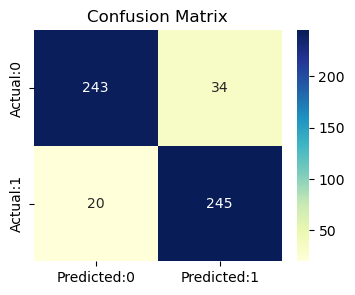

In [627]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Create a DataFrame for the confusion matrix
conf_matrix_data = {
    'Predicted:0': cm[:, 0],
    'Predicted:1': cm[:, 1]
}

conf_matrix = pd.DataFrame(data=conf_matrix_data, index=['Actual:0', 'Actual:1'])

# Plot the heatmap with decreased size
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

plt.title('Confusion Matrix')
plt.show()

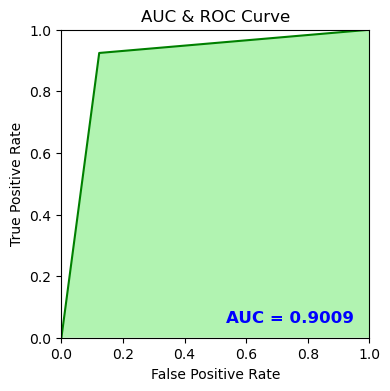

In [628]:
from sklearn.metrics import roc_curve, auc

# Calculate auc
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_xgb)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### 4. ExtraTreesClassifier

In [629]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Initialize ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(random_state=42)

# Fit the model
extra_trees_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_etc = extra_trees_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_etc)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8542435424354243


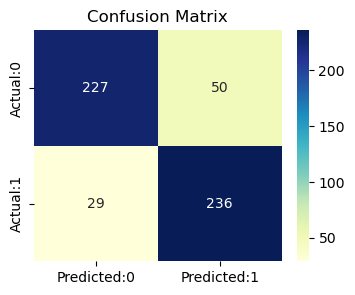

In [630]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_etc)

# Create a DataFrame for the confusion matrix
conf_matrix_data = {
    'Predicted:0': cm[:, 0],
    'Predicted:1': cm[:, 1]
}

conf_matrix = pd.DataFrame(data=conf_matrix_data, index=['Actual:0', 'Actual:1'])

# Plot the heatmap with decreased size
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

plt.title('Confusion Matrix')
plt.show()

In [631]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_etc)

print(report)

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85       277
         1.0       0.83      0.89      0.86       265

    accuracy                           0.85       542
   macro avg       0.86      0.86      0.85       542
weighted avg       0.86      0.85      0.85       542



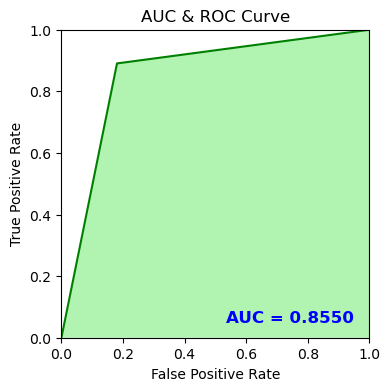

In [632]:
from sklearn.metrics import roc_curve, auc

# Calculate auc
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_etc)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_etc)

plt.figure(figsize=(6, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### 5. Gradient Boosting

In [633]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.2, max_depth = 3, random_state = 42)

gb_clf.fit(X_train, y_train)

train_pred = gb_clf.predict(X_train)

test_pred = gb_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)

test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

print(classification_report(y_test, test_pred))

Training Accuracy: 0.977818853974122
Test Accuracy: 0.9114391143911439
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       277
         1.0       0.90      0.92      0.91       265

    accuracy                           0.91       542
   macro avg       0.91      0.91      0.91       542
weighted avg       0.91      0.91      0.91       542



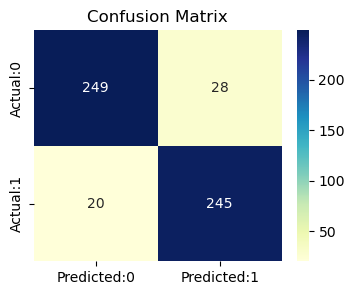

In [634]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_data = {
    'Predicted:0': cm[:, 0],
    'Predicted:1': cm[:, 1]
}

conf_matrix = pd.DataFrame(data=conf_matrix_data, index=['Actual:0', 'Actual:1'])

# Plot the heatmap with decreased size
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

plt.title('Confusion Matrix')
plt.show()

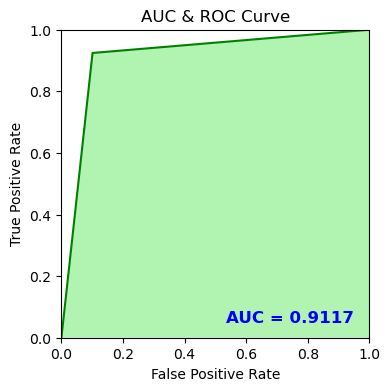

In [635]:
from sklearn.metrics import roc_curve, auc

# Calculate auc
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, test_pred)
auc
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, test_pred)

plt.figure(figsize=(6, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Conclusion

**Credit Card Approval Factors**:

- Critical factors for credit card approval are Years_employed and Income_type.

**Model Performance - Gradient Boosting**:

- Gradient Boosting model excelled in minimizing false negatives and positives, yielding a high AUC of 91%.

**Dataset Balancing - SMOTE Technique**:

- Balancing the dataset using SMOTE enhanced the model's ability to detect issues, outperforming other models.

**Data Enhancement Recommendation**:

- Acquiring more data, especially from the minority group, is crucial for building more robust predictive models.

<div style="text-align: center; font-size: 24px; color: #4CAF50;">
    <strong>THANK YOU</strong>
</div>
                                       